# Income And Happiness Correction 

In [1]:
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting
from IPython import display
from ipywidgets import interact,widgets 
%matplotlib inline
import re
import mailbox
import csv
import seaborn as sns 

In [2]:
data=pd.read_csv("/Users/sakshiashutosh/Downloads/happyscore_income.csv")

In [3]:
data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia
...,...,...,...,...,...,...,...,...,...,...,...
106,Uruguay,58.0,7.0,2.13,7544.40,5269.226667,45.014444,'Latin America and Caribbean',6.485,1.06166,Uruguay
107,Vietnam,53.0,6.1,1.77,2231.40,1643.580000,39.242500,'Southeastern Asia',5.360,0.63216,Vietnam
108,South Africa,49.0,6.3,2.47,3889.32,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa
109,Zambia,37.0,5.0,2.61,956.76,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia


In [8]:
data.describe()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,48.729730,5.936937,2.124595,6442.751416,5186.005304,38.417805,5.421910,0.841909
std,12.364131,1.356394,0.316546,6479.533692,5587.037239,8.375557,1.180801,0.387591
min,19.000000,2.500000,1.380000,572.880000,415.480000,24.215000,2.839000,0.015300
25%,40.000000,5.100000,1.910000,1519.388684,1167.717333,32.182857,4.568000,0.509930
50%,48.000000,6.000000,2.130000,3889.320000,2646.973333,36.480000,5.268000,0.918610
75%,57.000000,7.000000,2.330000,7867.402500,6581.124643,43.380000,6.392000,1.149485
max,74.000000,8.500000,3.190000,26182.275000,22240.230000,63.726667,7.587000,1.563910


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [6]:
data.columns

Index(['country', 'adjusted_satisfaction', 'avg_satisfaction',
       'std_satisfaction', 'avg_income', 'median_income', 'income_inequality',
       'region', 'happyScore', 'GDP', 'country.1'],
      dtype='object')

## Plotting - Country vs Adjusted Satisfaction

<AxesSubplot:xlabel='adjusted_satisfaction', ylabel='country'>

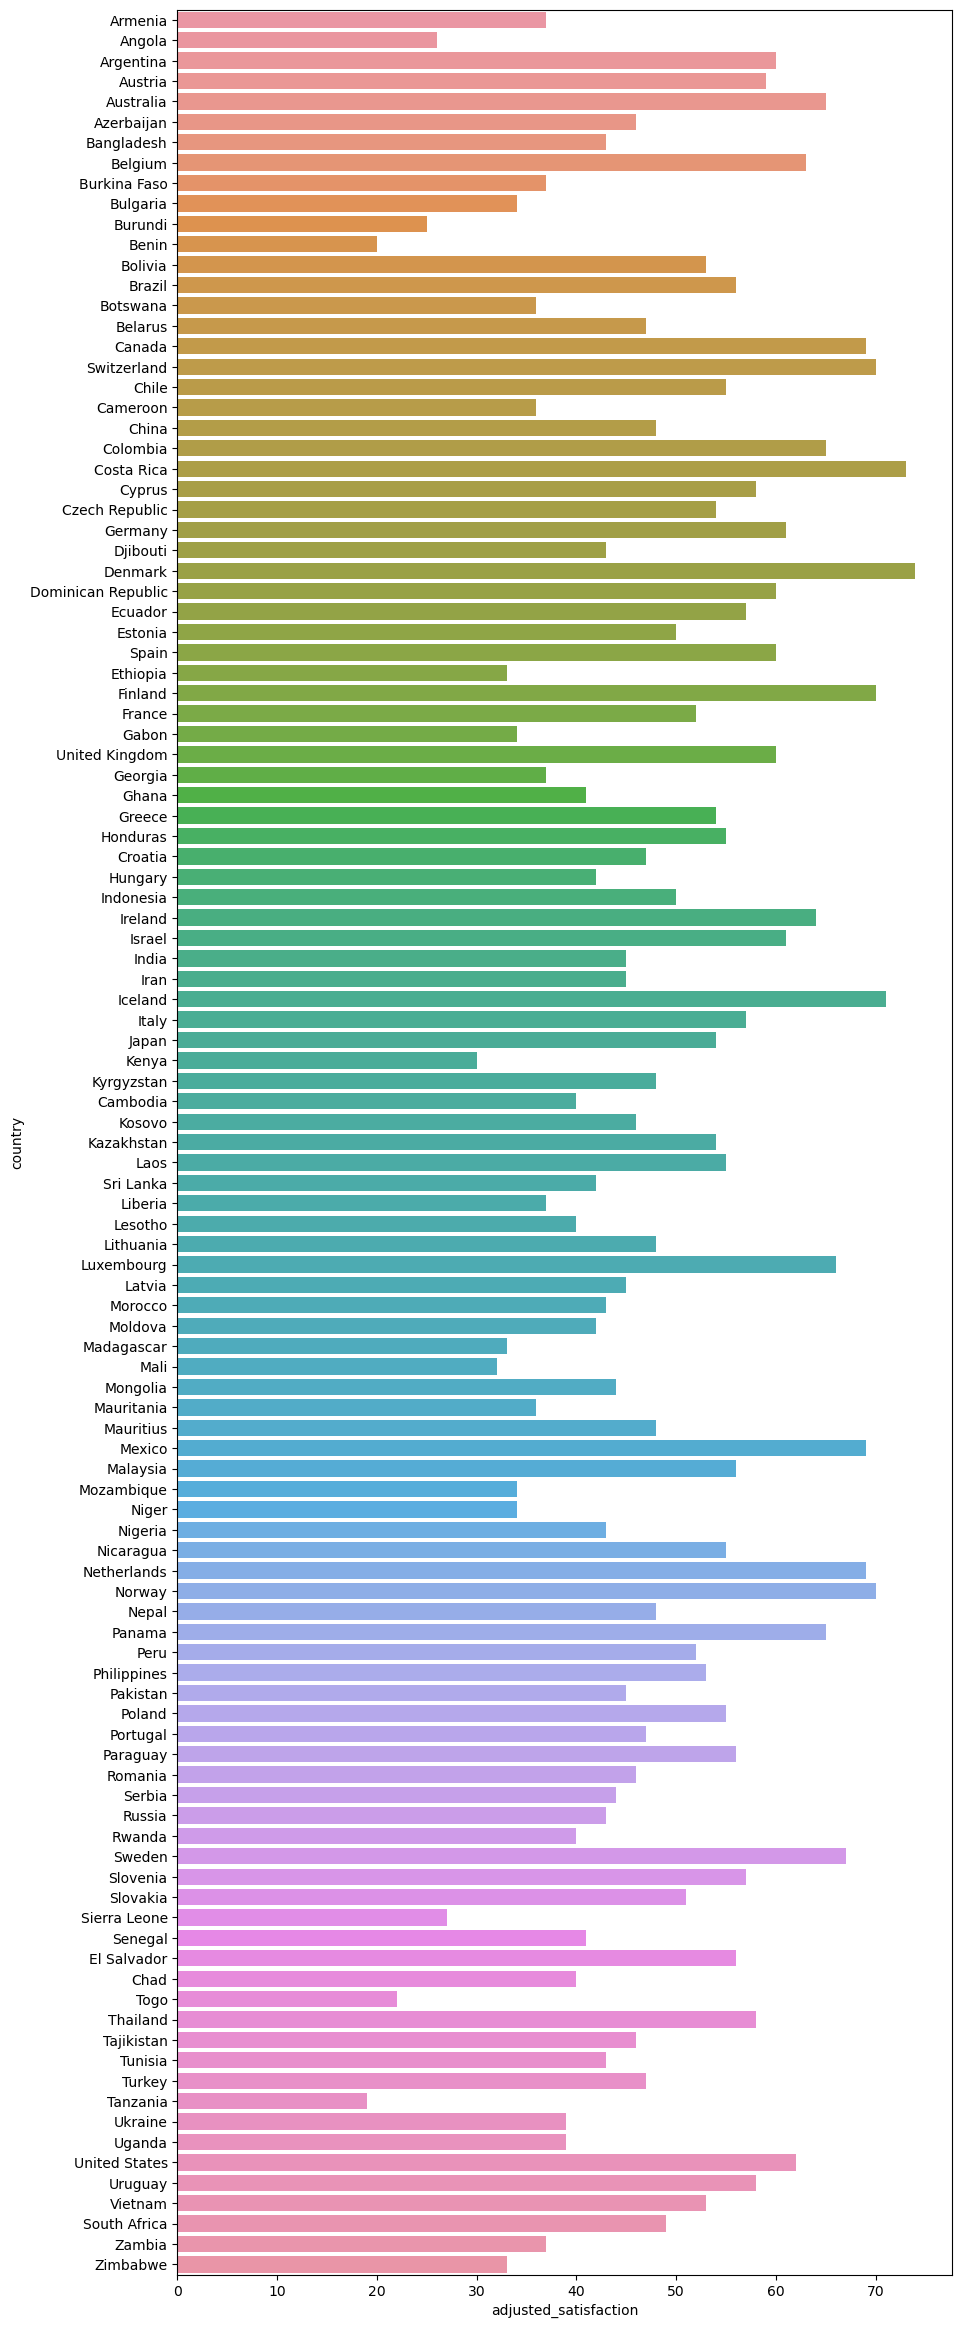

In [76]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.adjusted_satisfaction,y=data.country,data=data)

* Denmark is on top in the list of adjusted satisfaction with value of 74 .
* Tanzania is on bottom in the list of adjusted satisfaction with value of 19 .

In [27]:
data.adjusted_satisfaction.sort_values(ascending=True).head(10)


102    19.0
11     20.0
97     22.0
10     25.0
1      26.0
93     27.0
51     30.0
66     32.0
65     33.0
110    33.0
Name: adjusted_satisfaction, dtype: float64

In [75]:
data.adjusted_satisfaction.sort_values(ascending=True).tail(10)

90    67.0
16    69.0
76    69.0
70    69.0
17    70.0
33    70.0
77    70.0
48    71.0
22    73.0
27    74.0
Name: adjusted_satisfaction, dtype: float64

## Plotting - Country vs Average Satisfaction 

<AxesSubplot:xlabel='avg_satisfaction', ylabel='country'>

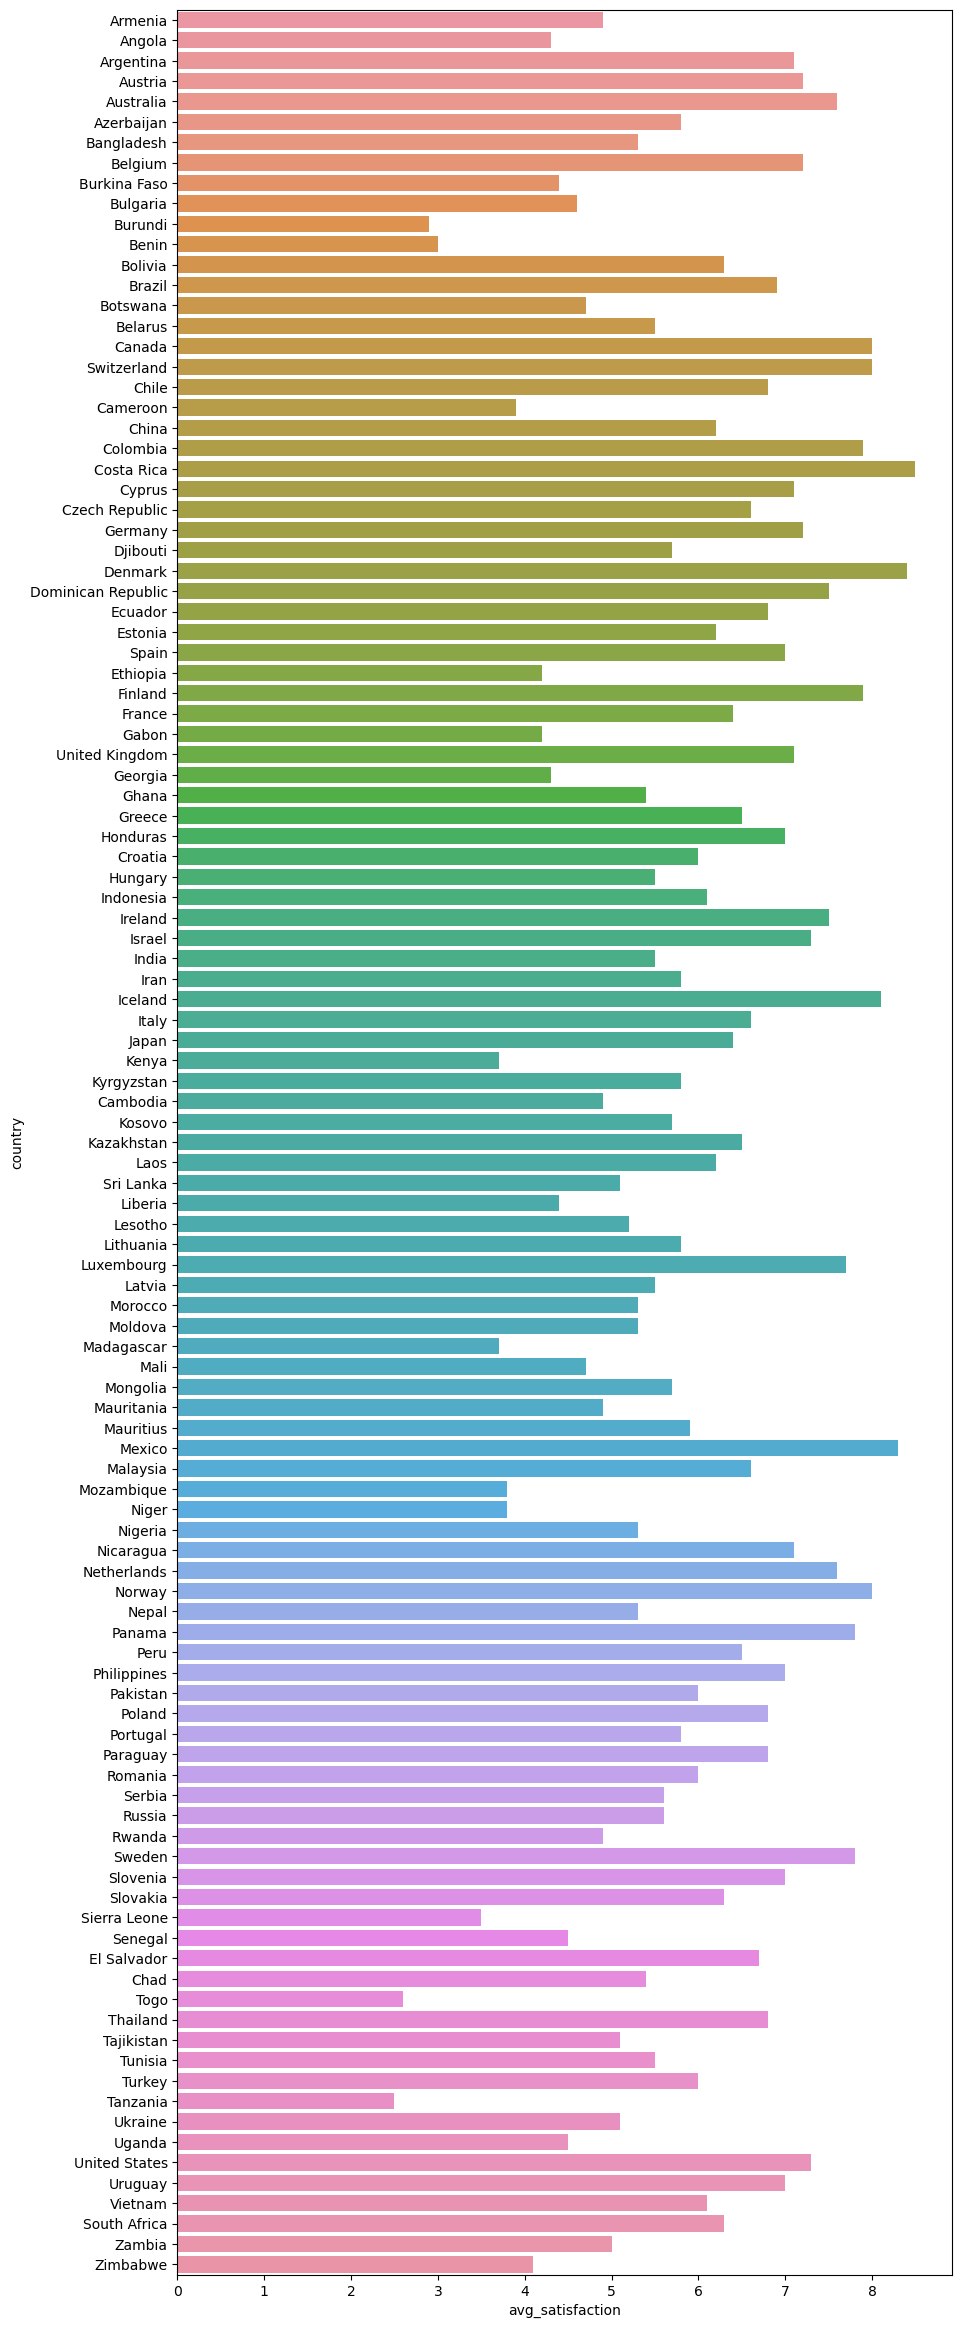

In [37]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.avg_satisfaction,y=data.country,data=data)

* Costa Rica is on the top list of average satisfaction with value of 8.5 .
* Tanzania is on the bottom list of average satisfaction with value of 2.5 .


In [120]:
data.avg_satisfaction.sort_values(ascending=True).head(10)

102    2.5
97     2.6
10     2.9
11     3.0
93     3.5
51     3.7
65     3.7
73     3.8
72     3.8
19     3.9
Name: avg_satisfaction, dtype: float64

In [44]:
data.avg_satisfaction.sort_values(ascending=True).tail(10)


90    7.8
33    7.9
21    7.9
77    8.0
16    8.0
17    8.0
48    8.1
70    8.3
27    8.4
22    8.5
Name: avg_satisfaction, dtype: float64

## Plotting - Country vs Standard Satisfaction 

<AxesSubplot:xlabel='std_satisfaction', ylabel='country'>

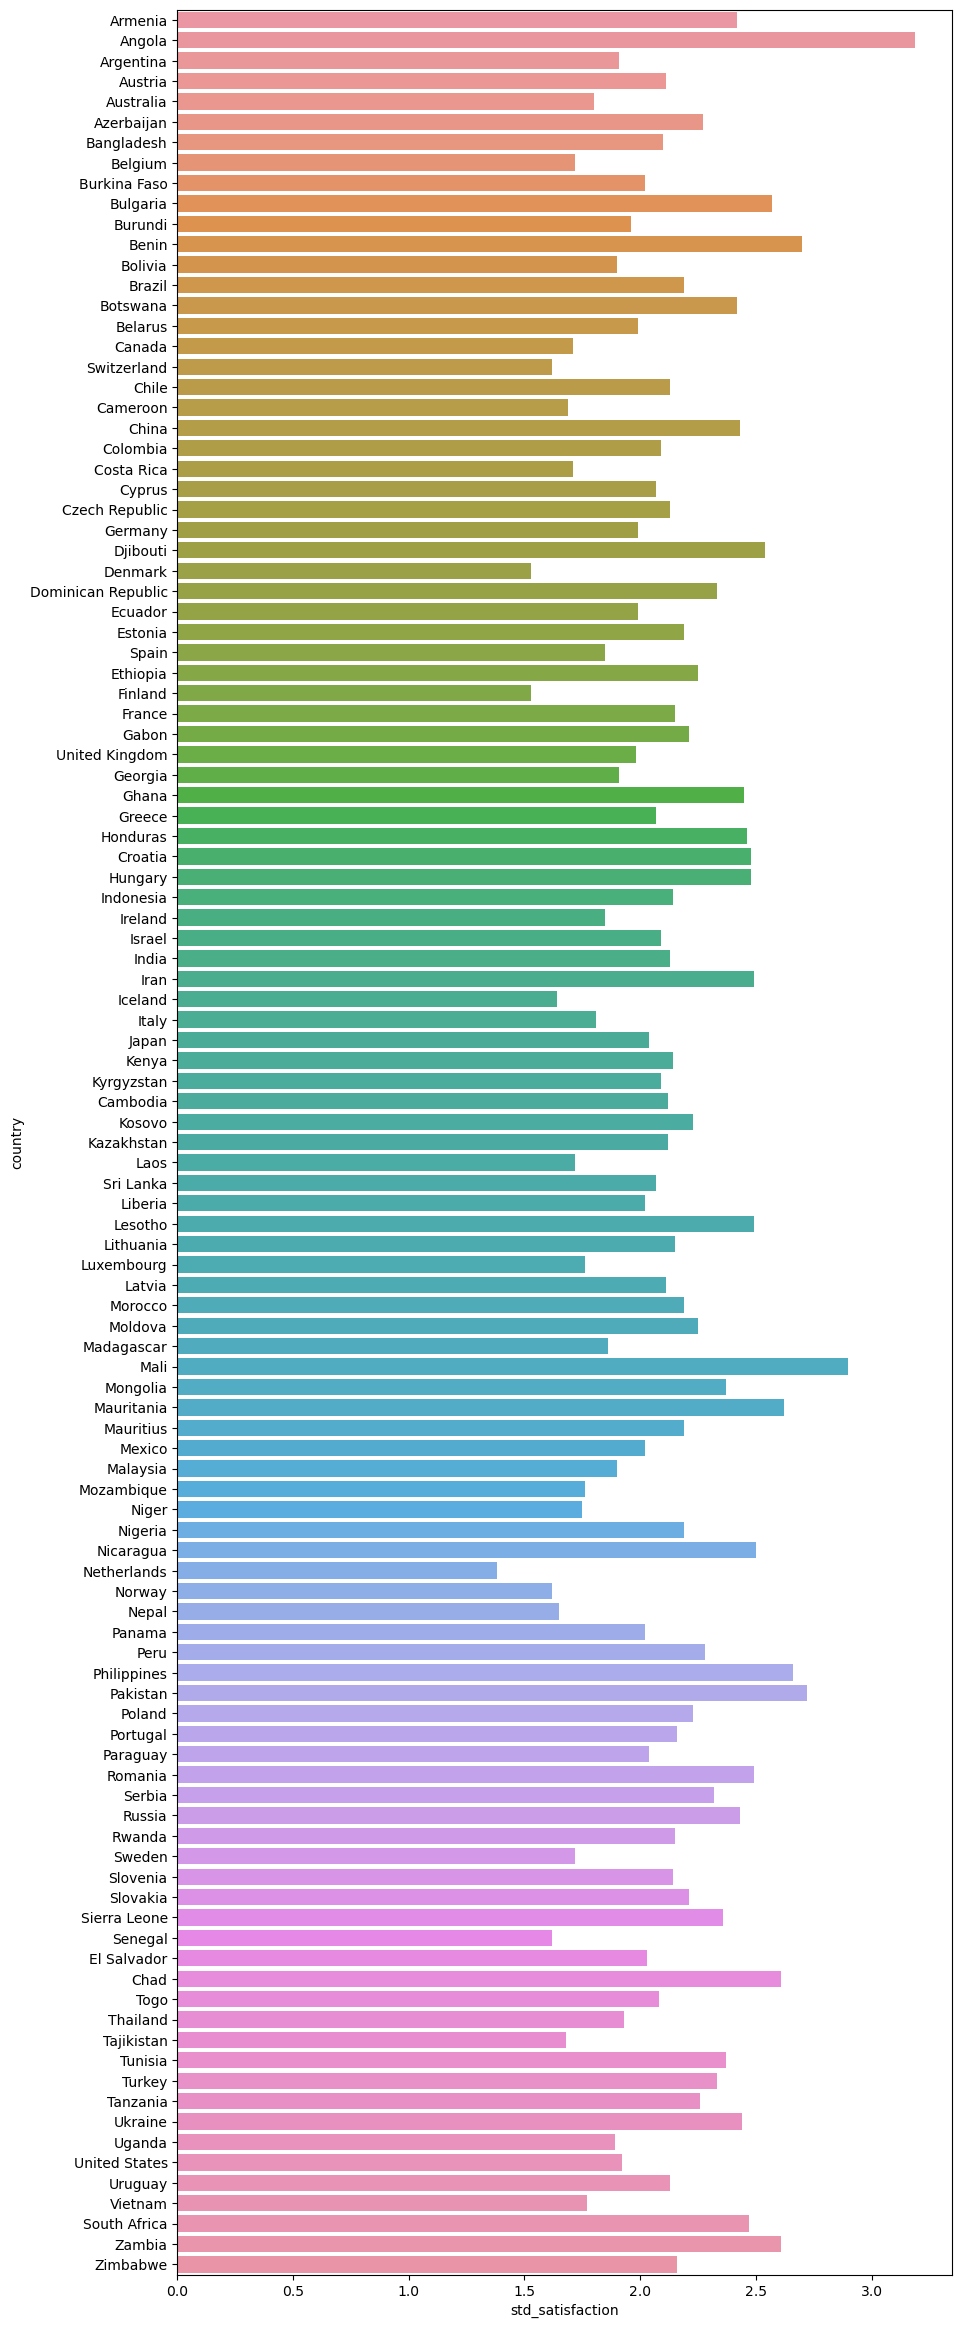

In [40]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.std_satisfaction,y=data.country,data=data)

* Angola is on the top list of standard satisfaction with value of 3.19 .
* Netherlands is on the bottom list of standard staisfaction with value of 1.38 .

In [41]:
data.std_satisfaction.sort_values(ascending=True).head(10)


76    1.38
33    1.53
27    1.53
77    1.62
94    1.62
17    1.62
48    1.64
78    1.65
99    1.68
19    1.69
Name: std_satisfaction, dtype: float64

In [45]:
data.std_satisfaction.sort_values(ascending=True).tail(10)


26     2.54
9      2.57
109    2.61
96     2.61
68     2.62
81     2.66
11     2.70
82     2.72
66     2.90
1      3.19
Name: std_satisfaction, dtype: float64

## Plotting - Country vs Average Income

<AxesSubplot:xlabel='avg_income', ylabel='country'>

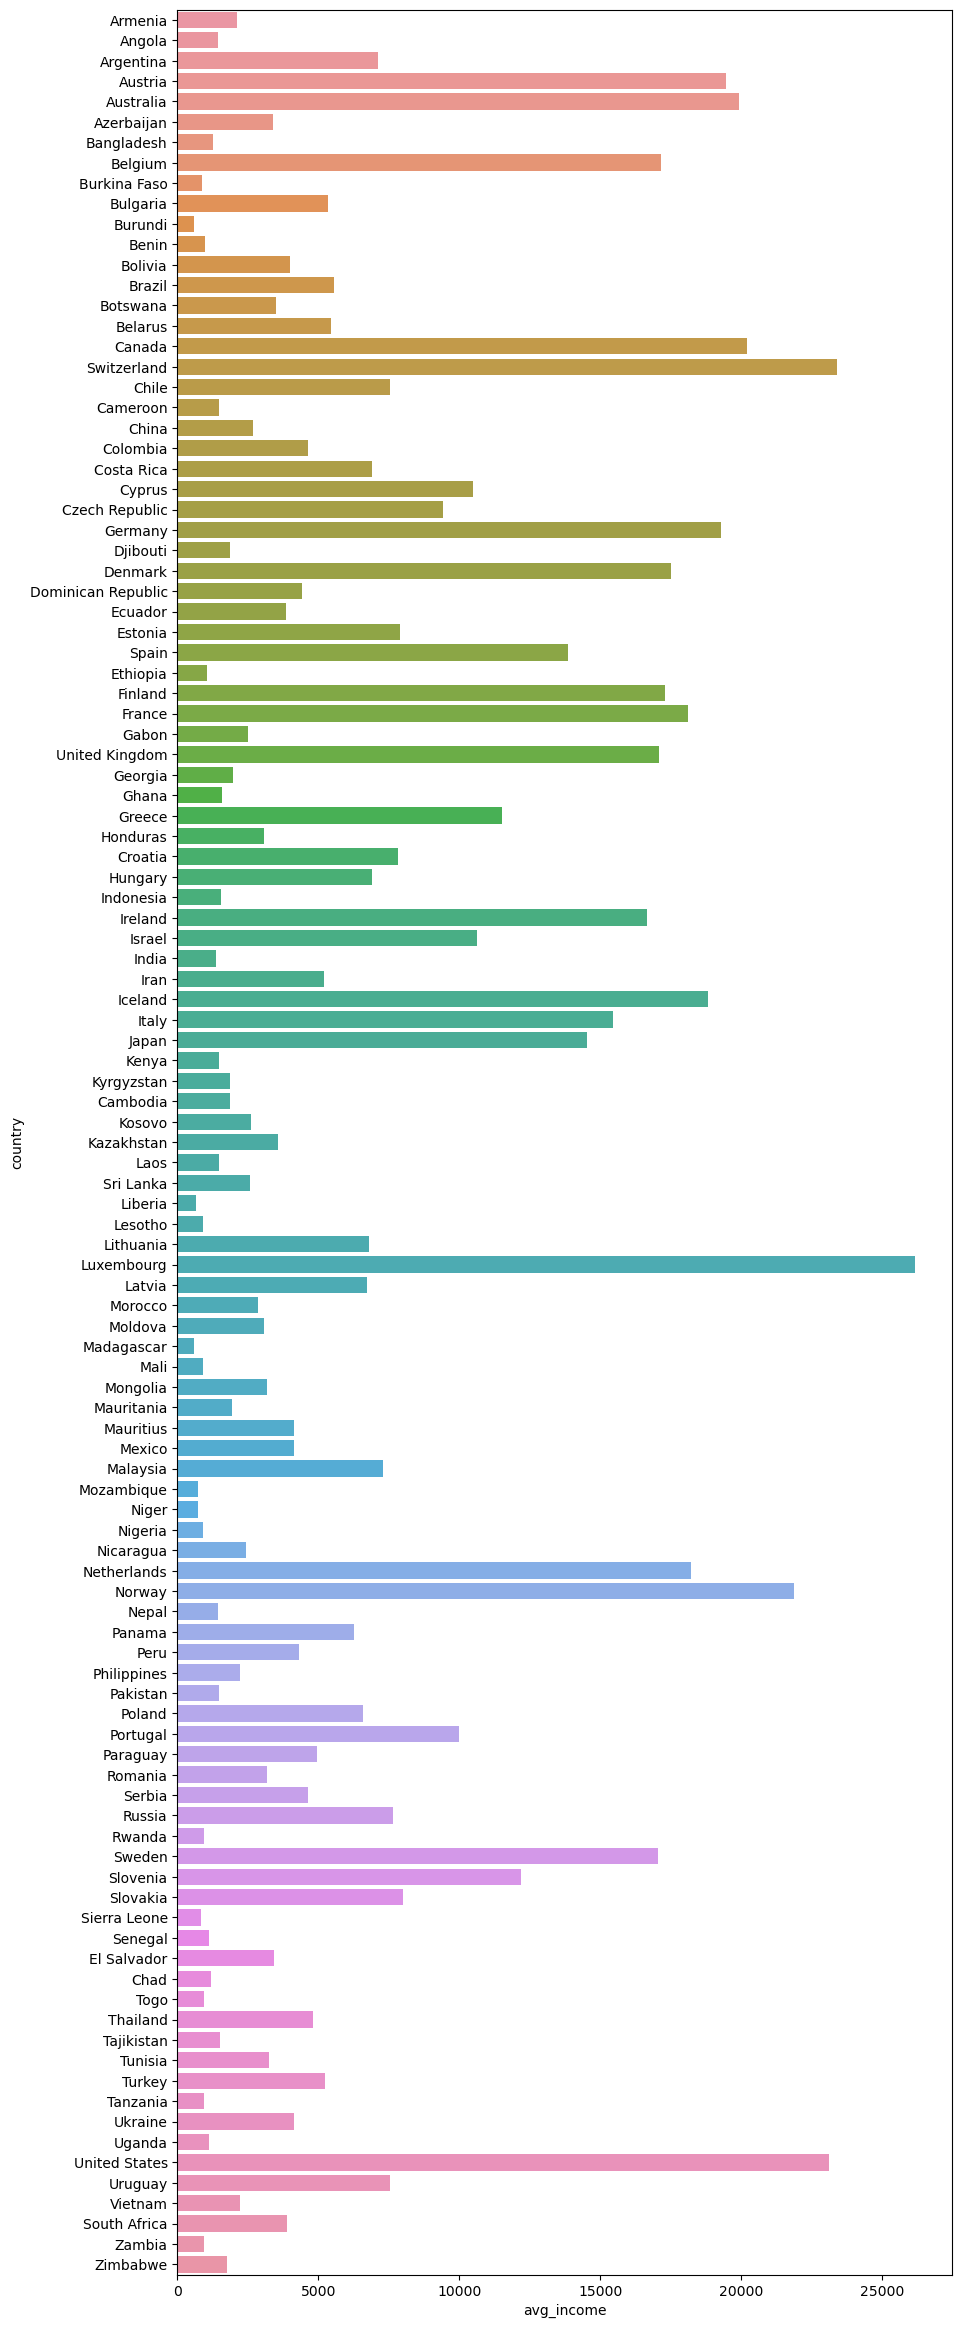

In [43]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.avg_income,y=data.country,data=data)

* Luxembourg is on the top list of average income with value of 26182.275000 .
* Burundi is on the botttom list of average income with value of 572.880 .

In [47]:
data.avg_income.sort_values(ascending=True).head(10)


10    572.88
65    574.20
58    653.04
72    714.72
73    718.40
93    850.08
8     870.84
66    903.30
59    908.64
74    910.32
Name: avg_income, dtype: float64

In [48]:
data.avg_income.sort_values(ascending=True).tail(10)


76     18234.435
48     18828.345
25     19285.960
3      19457.040
4      19917.000
16     20190.780
77     21877.710
105    23127.000
17     23400.040
61     26182.275
Name: avg_income, dtype: float64

## Plotting - Country vs Median Income

<AxesSubplot:xlabel='median_income', ylabel='country'>

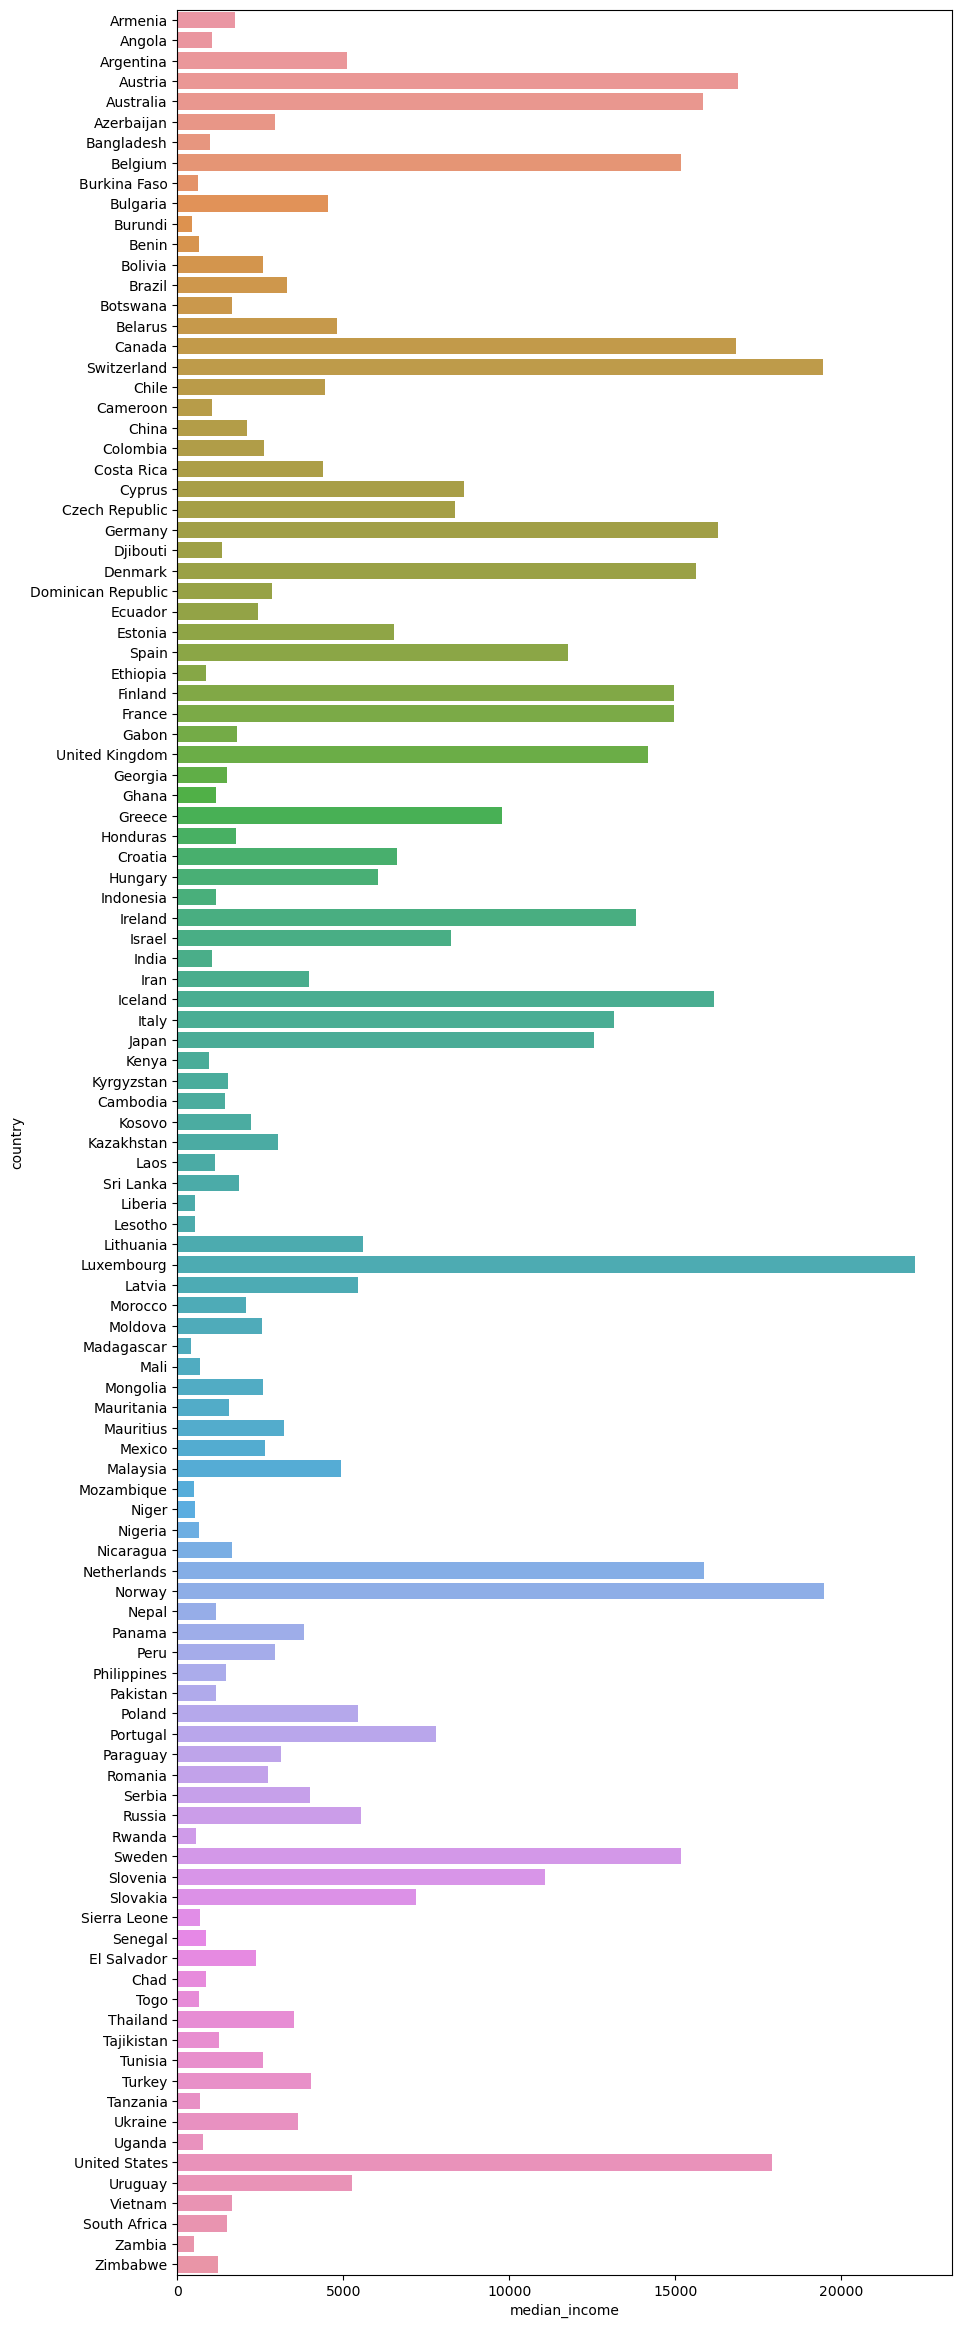

In [49]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.median_income,y=data.country,data=data)

In [50]:
data.median_income.sort_values(ascending=True).head(10)


65     415.48
10     436.92
72     488.52
109    510.06
58     528.72
59     532.92
73     535.56
89     549.44
8      630.24
97     636.00
Name: median_income, dtype: float64

In [51]:
data.median_income.sort_values(ascending=True).tail(10)


4      15846.060
76     15880.545
48     16179.315
25     16291.260
16     16829.100
3      16879.620
105    17925.360
17     19442.920
77     19477.620
61     22240.230
Name: median_income, dtype: float64

## Plotting - Country vs  Income Inequality

<AxesSubplot:xlabel='income_inequality', ylabel='country'>

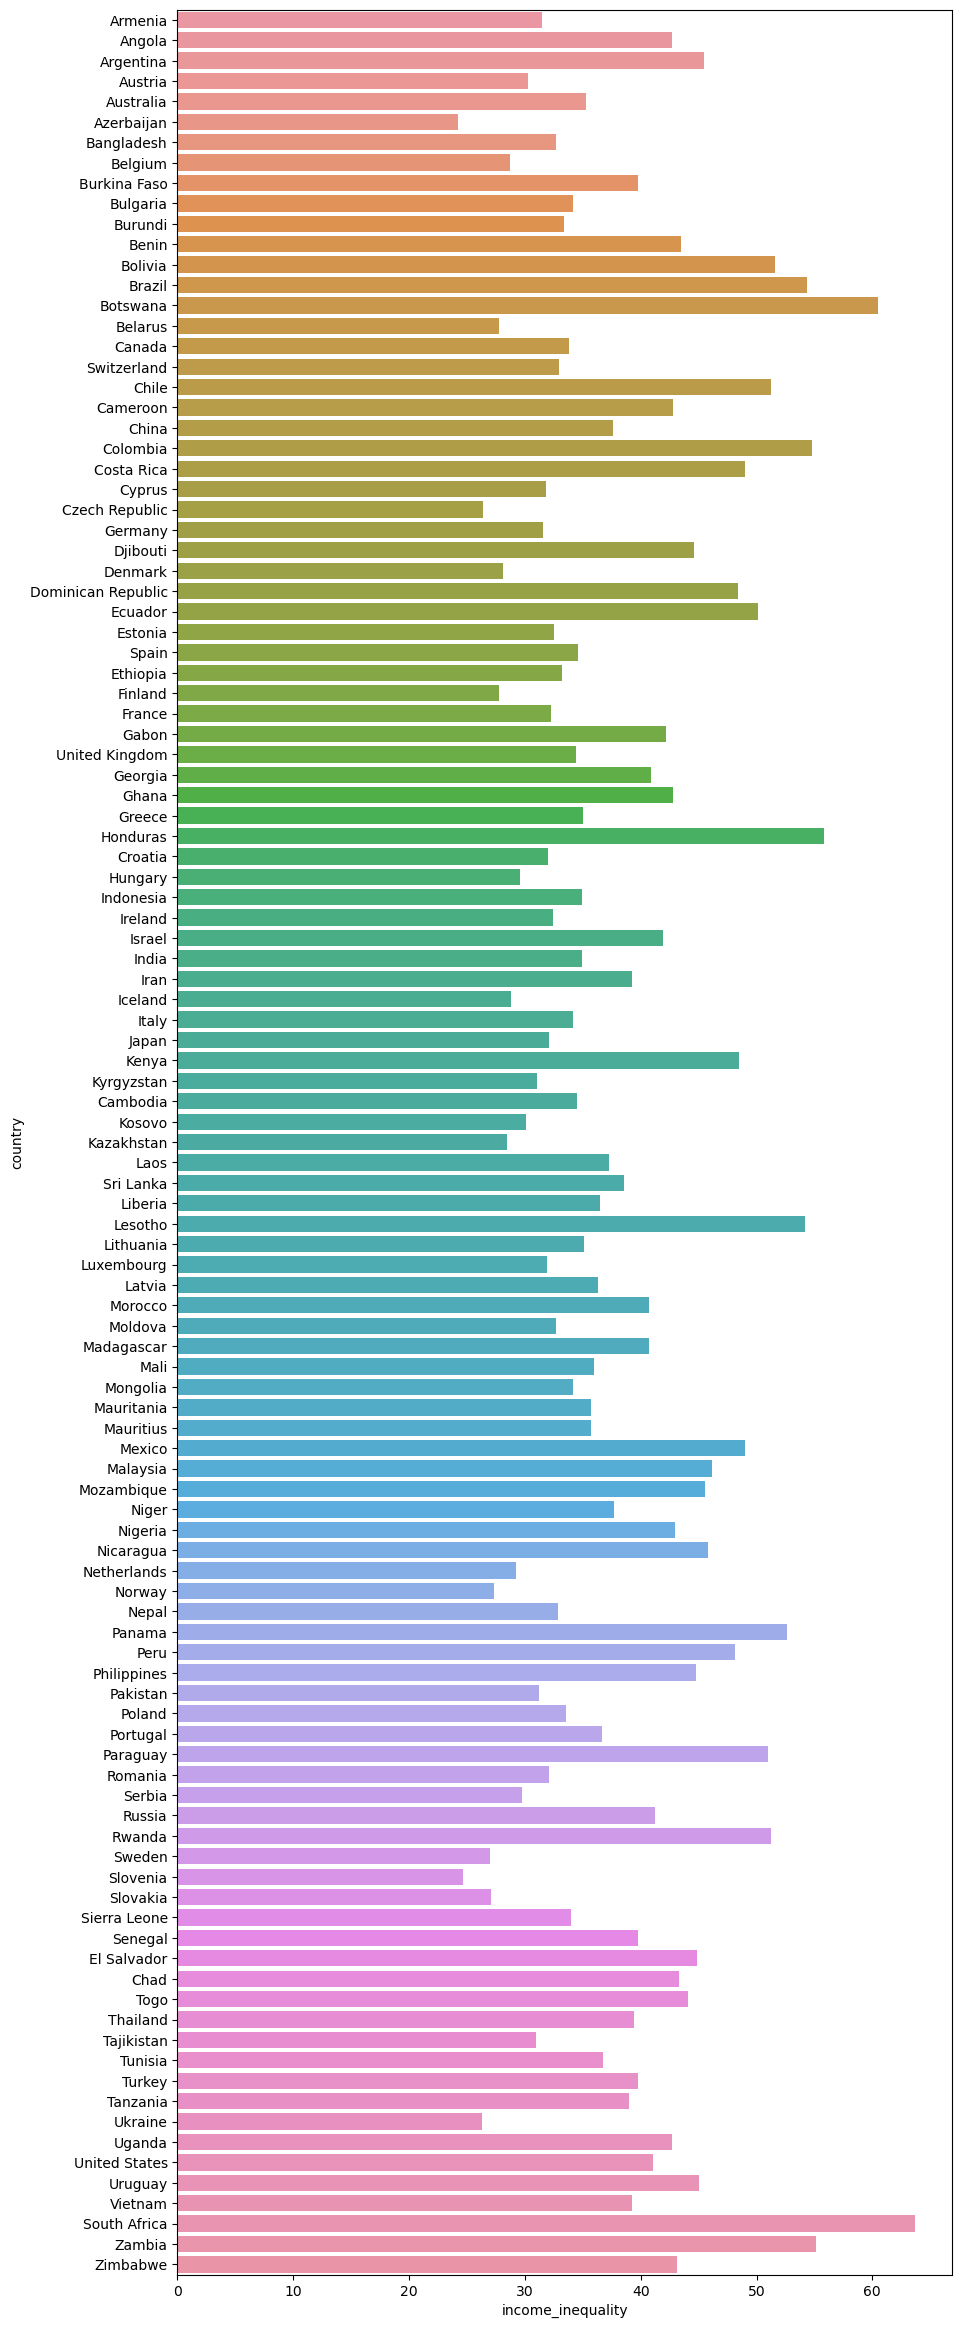

In [52]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.income_inequality,y=data.country,data=data)

In [53]:
data.income_inequality.sort_values(ascending=True).head(10)


5      24.215000
91     24.678750
103    26.271111
24     26.413750
90     26.950000
92     27.056154
77     27.307500
33     27.723750
15     27.754444
27     28.155000
Name: income_inequality, dtype: float64

In [54]:
data.income_inequality.sort_values(ascending=True).tail(10)


89     51.273333
12     51.610000
79     52.664444
59     54.180000
13     54.333750
21     54.815714
109    55.120000
40     55.805556
14     60.460000
108    63.726667
Name: income_inequality, dtype: float64

In [60]:
data['region'].value_counts()

'Sub-Saharan Africa'                 30
'Central and Eastern Europe'         23
'Western Europe'                     19
'Latin America and Caribbean'        16
'Southeastern Asia'                   7
'Southern Asia'                       5
'Middle East and Northern Africa'     5
'Eastern Asia'                        3
'North America'                       2
'Australia and New Zealand'           1
Name: region, dtype: int64

/Users/sakshiashutosh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


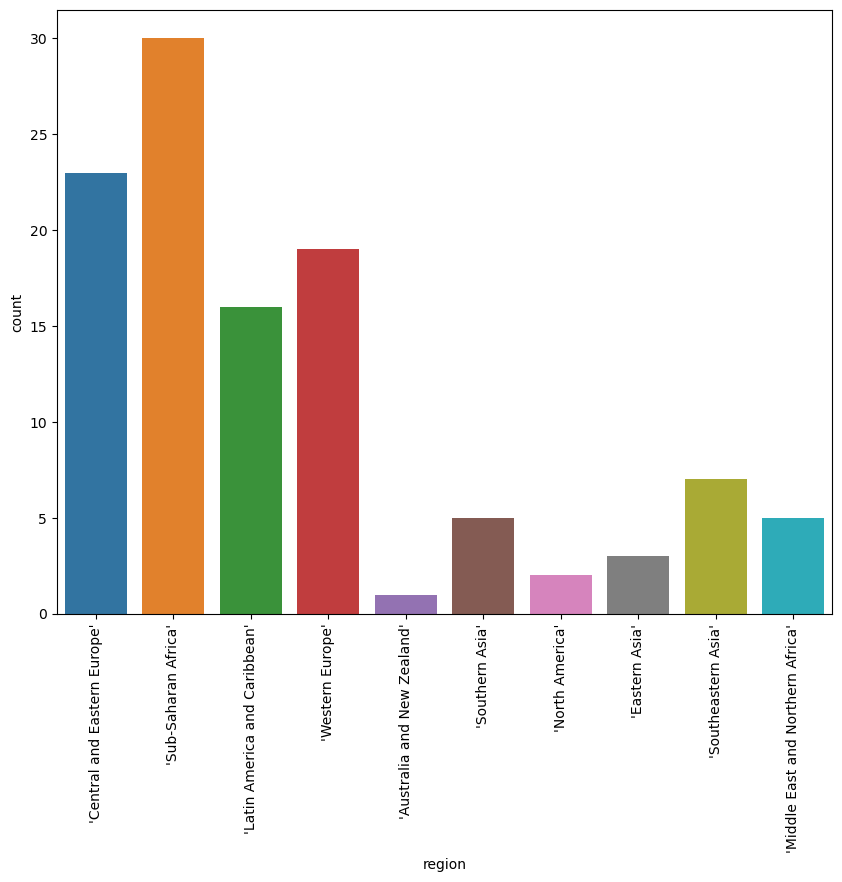

In [65]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(data.region)
plt.xticks(rotation=90)
plt.show()

* We can see from the above graph that 'Sub-Saharan Africa' is the region with the maximum counts of country .
* And 'Australia and New Zealand ' is the region with minimum counts of the country.

## Plotting - Country vs  Happy Score

<AxesSubplot:xlabel='happyScore', ylabel='country'>

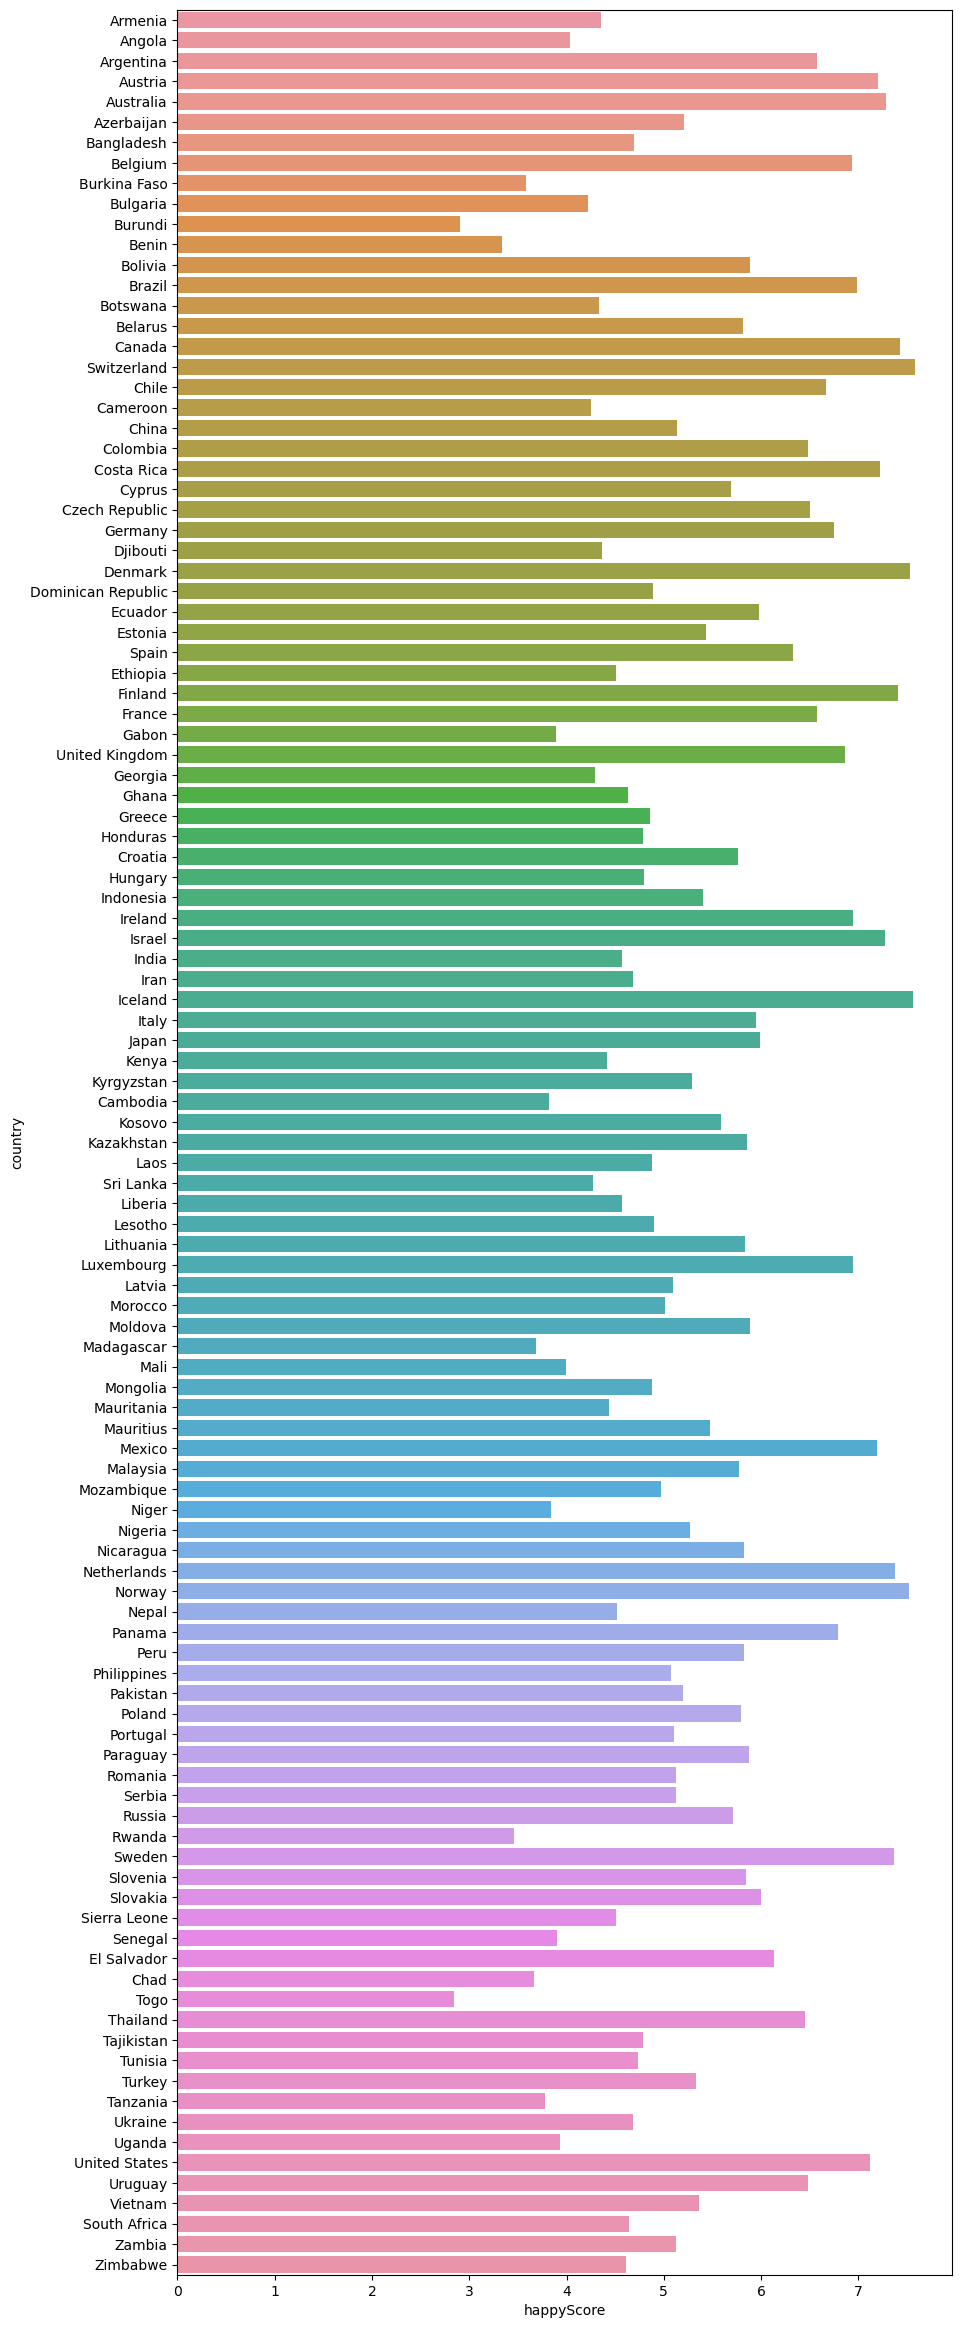

In [67]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.happyScore,y=data.country,data=data)

* Switzerland is on the top list of happy score with a value of 7.587 .
* Togo is on the bottom list of happy score with value of 2.839 .

In [68]:
data.happyScore.sort_values(ascending=True).head(10)


97     2.839
10     2.905
11     3.340
89     3.465
8      3.587
96     3.667
65     3.681
102    3.781
53     3.819
73     3.845
Name: happyScore, dtype: float64

In [72]:
data.happyScore.sort_values(ascending=True).tail(10)


45    7.278
4     7.284
90    7.364
76    7.378
33    7.406
16    7.427
77    7.522
27    7.527
48    7.561
17    7.587
Name: happyScore, dtype: float64

 * Switzerland is the country with maximum happy score.
 * Togo is the country with minimum happy score.

## Plotting - Country vs GDP

<AxesSubplot:xlabel='GDP', ylabel='country'>

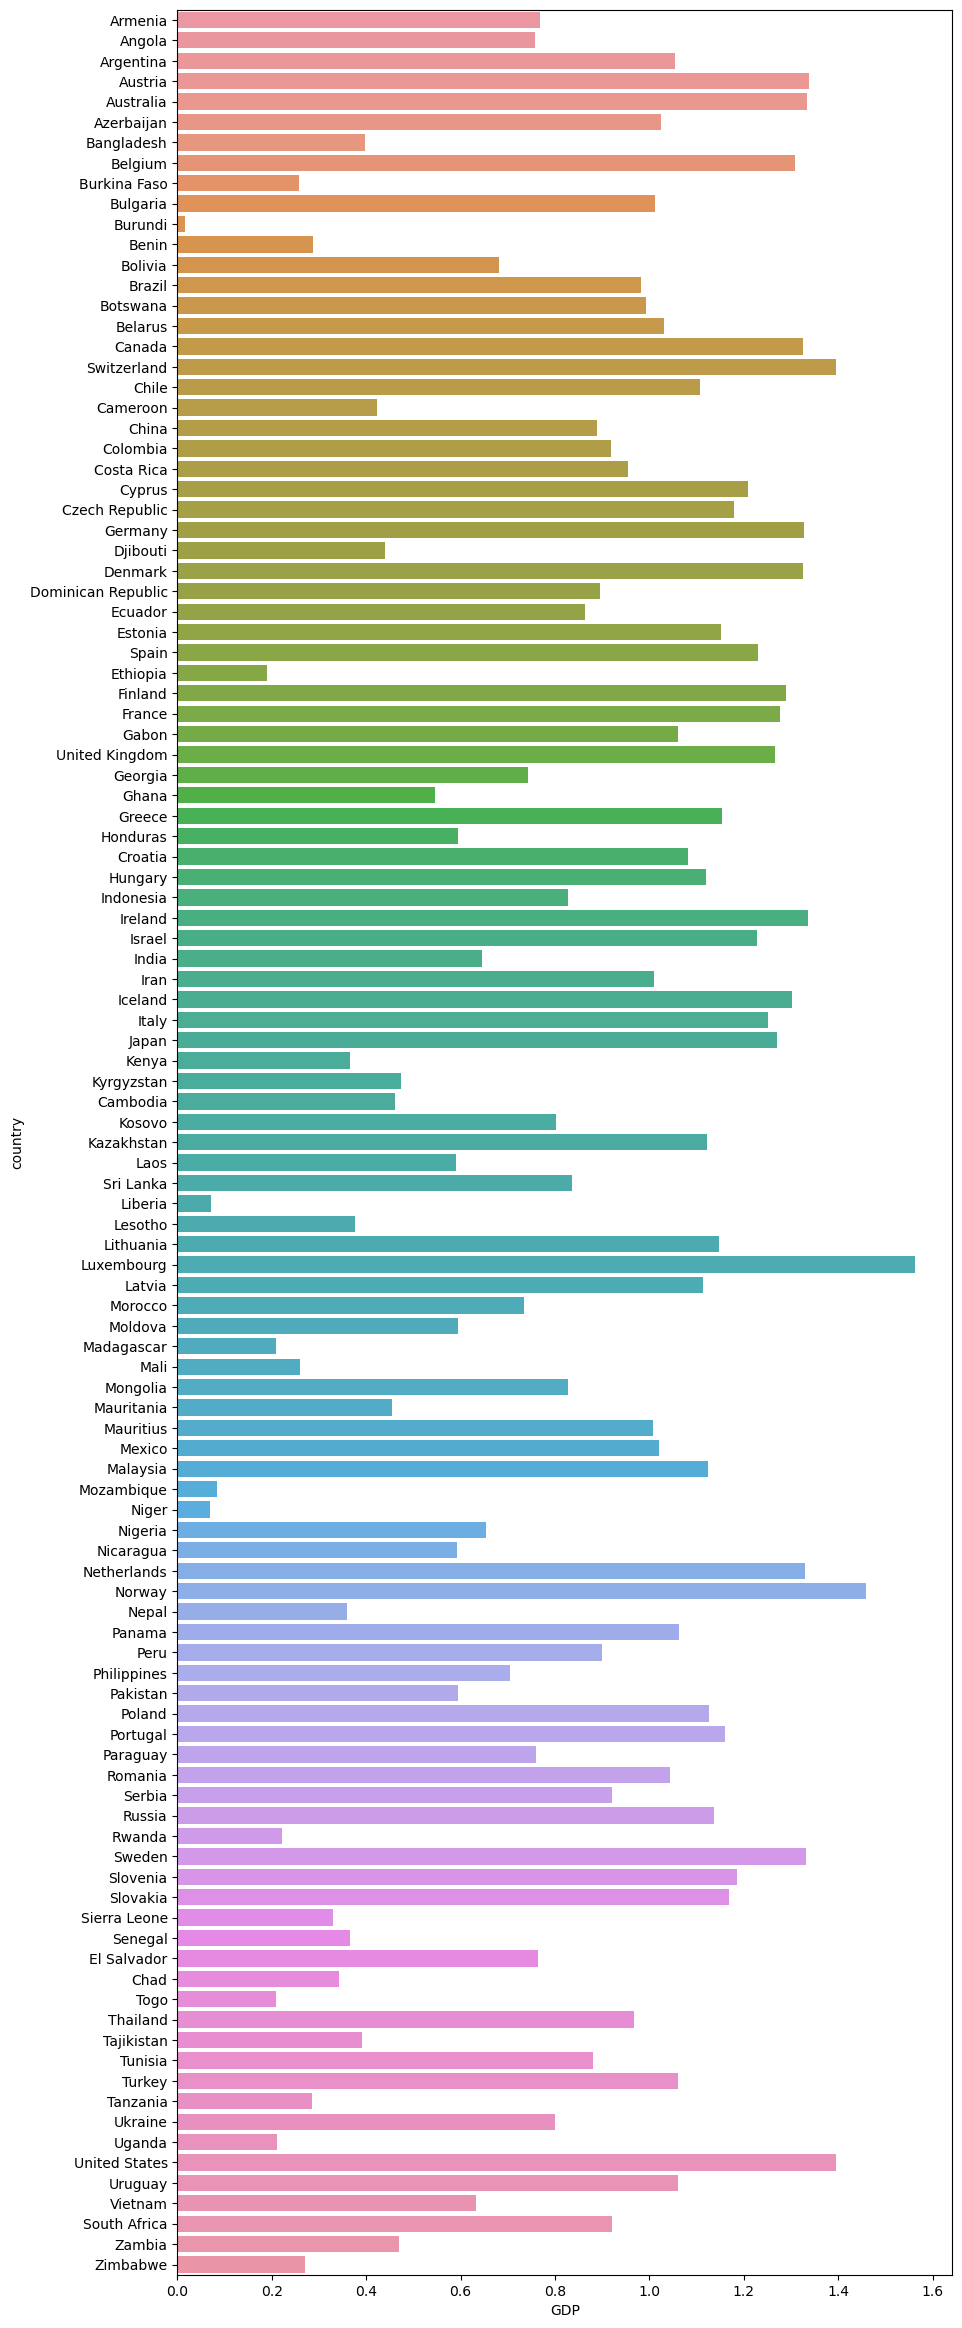

In [77]:
plt.figure(figsize=(10,30),dpi=100)
sns.barplot(x=data.GDP,y=data.country,data=data)

* Luxemburg is on the top list of GDP with a value of 1.56391 .
* Burundi is on the bottom list of GDP with a vlue of 0.01530 .

In [78]:
data.GDP.sort_values(ascending=True).head(10)


10     0.01530
73     0.06940
58     0.07120
72     0.08308
32     0.19073
65     0.20824
97     0.20868
104    0.21102
89     0.22208
8      0.25812
Name: GDP, dtype: float64

In [79]:
data.GDP.sort_values(ascending=True).tail(10)


25     1.32792
76     1.32944
90     1.33171
4      1.33358
44     1.33596
3      1.33723
105    1.39451
17     1.39651
77     1.45900
61     1.56391
Name: GDP, dtype: float64

## Average Satisfaction vs Average Income

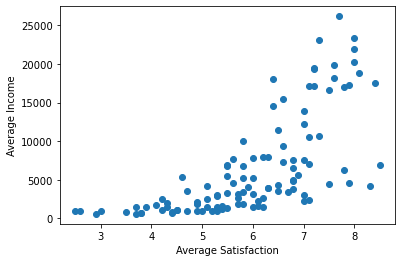

In [84]:
plt.scatter(data.avg_satisfaction,data.avg_income)
plt.xlabel("Average Satisfaction")
plt.ylabel("Average Income")
plt.show()

* From the above plot we have two conclusions -
  * Average satisfaction is good in case of lower average income .
  * Also we can see that average satisfaction and average income is postively correlated with each other .

## Standard Satisfaction vs Average Income

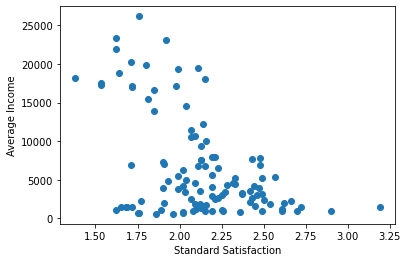

In [85]:
plt.scatter(data.std_satisfaction,data.avg_income)
plt.xlabel("Standard Satisfaction")
plt.ylabel("Average Income")
plt.show()

* From the above plot we have two conclusions -
  *  Standard satisfaction lies between range of (1.50-2.75) for the low average income .
  *  For the country with high average income lies in lower standard satisfaction .
 * We can also conclude that the graph is negatively corelated with each other .

## Average Satisfaction vs Income Inequality

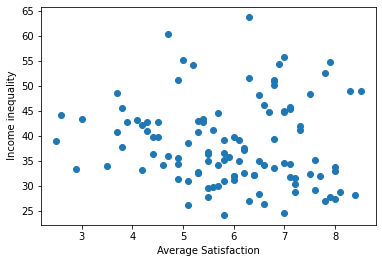

In [86]:
plt.scatter(data.avg_satisfaction,data.income_inequality)
plt.xlabel("Average Satisfaction")
plt.ylabel(" Income inequality")
plt.show()

## Average Income vs Income Inequality

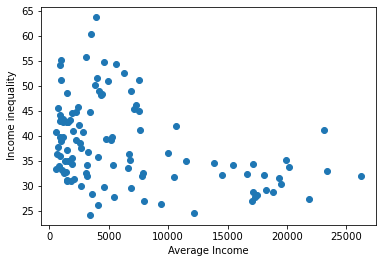

In [87]:
plt.scatter(data.avg_income,data.income_inequality)
plt.xlabel("Average Income")
plt.ylabel(" Income inequality")
plt.show()

* From the above plot we have two conclusions -
  * Income inequality is high for lower average income .
  * income inequality id =s low for higher average income .

## Average Income vs Happy Score

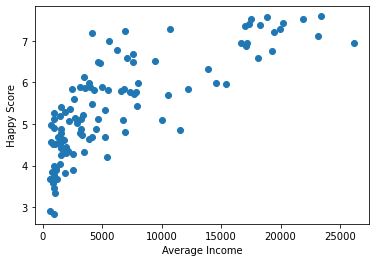

In [88]:
plt.scatter(data.avg_income,data.happyScore)
plt.xlabel("Average Income")
plt.ylabel(" Happy Score ")
plt.show()

* From the above plot we have two conclusions -
  * For Lower average income happy score lies in the range of (2-7).
  * For higher average income happy score lies only in the range of (6-7+)

## Average Satisfaction  vs Happy Score

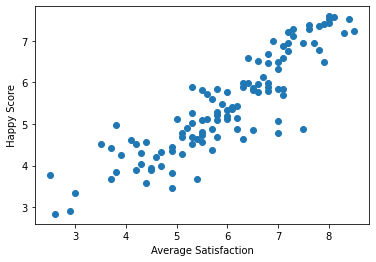

In [89]:
plt.scatter(data.avg_satisfaction,data.happyScore)
plt.xlabel("Average Satisfaction")
plt.ylabel(" Happy Score ")
plt.show()

* This graph clearly shows a postively correlation between Happy score and Average Satisfaction.

## Average Income vs GDP

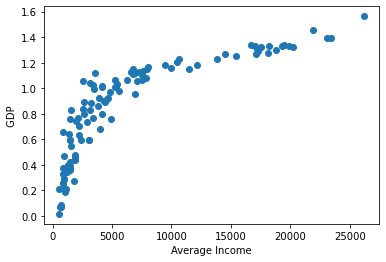

In [90]:
plt.scatter(data.avg_income,data.GDP)
plt.xlabel("Average Income")
plt.ylabel(" GDP ")
plt.show()

* From the above plot we have two conclusions -
   * For lower average income GDP lies in the range of (0-1.2).
   * For Higher average income GDP lies only in the range of (1.2-16).

## Average Satisfaction vs GDP

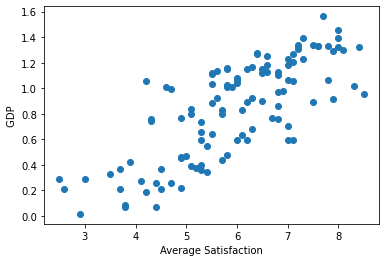

In [91]:
plt.scatter(data.avg_satisfaction,data.GDP)
plt.xlabel("Average Satisfaction")
plt.ylabel(" GDP ")
plt.show()

* The above graph shows a positive coorelation between GDP and Average Satisfaction.

## [ GDP vs Happy Score ] With respect to different Region

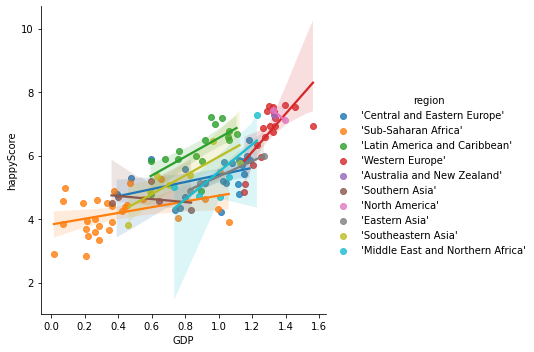

In [103]:
sns.lmplot(x="GDP",y="happyScore",hue = "region", data =data)
plt.show()


<Figure size 2000x2000 with 0 Axes>

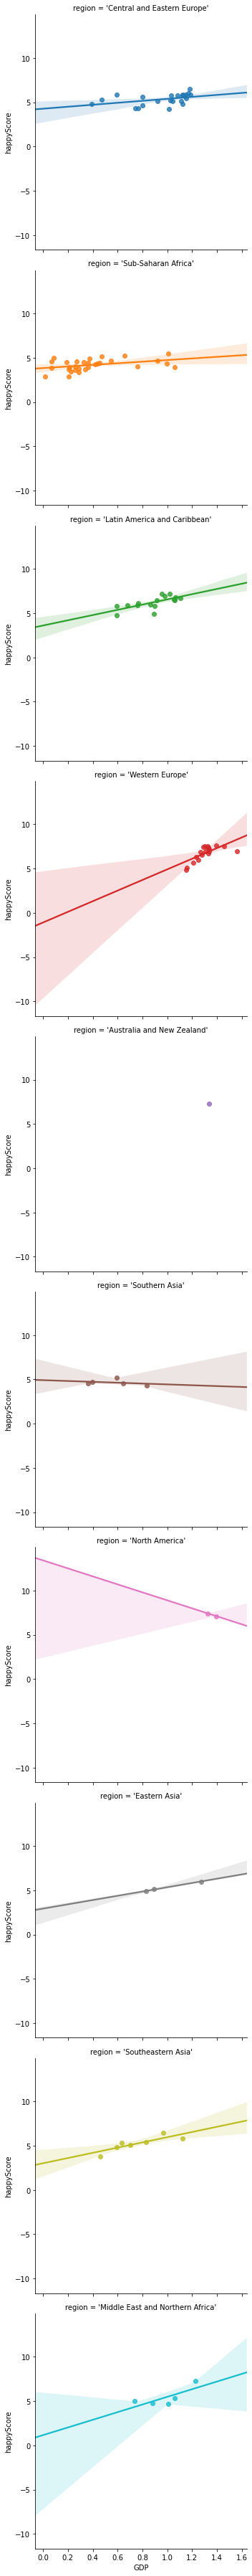

In [104]:
plt.figure(figsize=(20,20),dpi=100)
sns.lmplot(x="GDP",y="happyScore",hue = "region", data =data,row="region",truncate=False)
plt.show()


## [ GDP vs Average Income  ] With respect to different Region

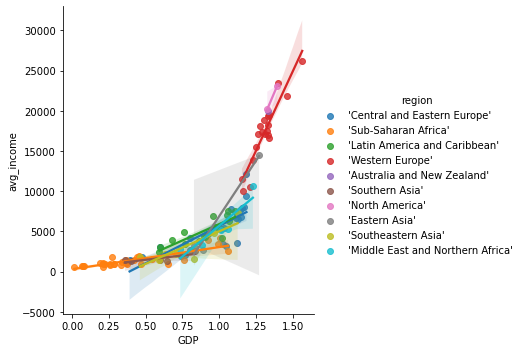

In [105]:
sns.lmplot(x="GDP",y="avg_income",hue = "region", data =data)
plt.show()


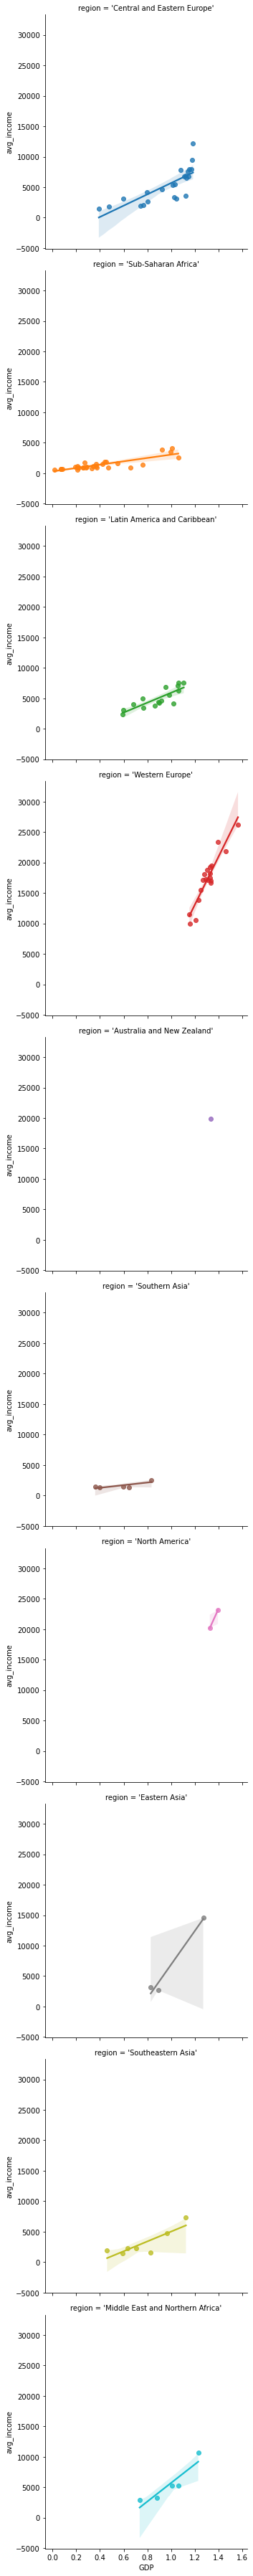

In [112]:
sns.lmplot(x="GDP",y="avg_income",hue = "region", data =data,row="region")
plt.show()


## [GDP vs Average Satisfaction ] With respect to different Region

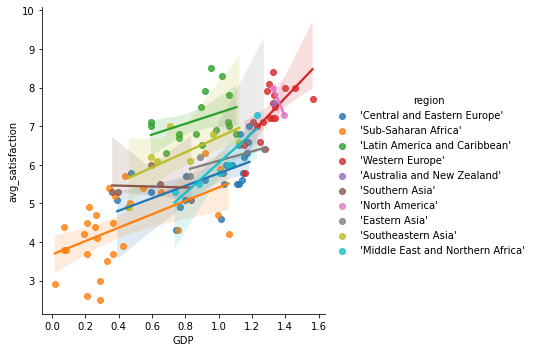

In [106]:
sns.lmplot(x="GDP",y="avg_satisfaction",hue = "region", data =data)
plt.show()


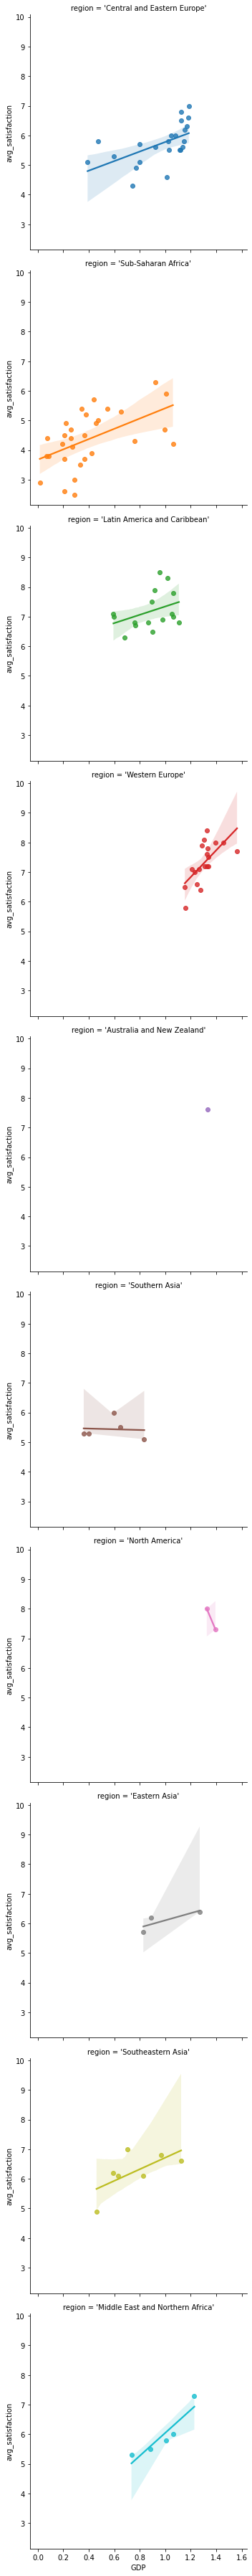

In [111]:
sns.lmplot(x="GDP",y="avg_satisfaction",hue = "region", data =data,row="region")
plt.show()


## [ Average Income vs Happy Score ] With respect to different Region

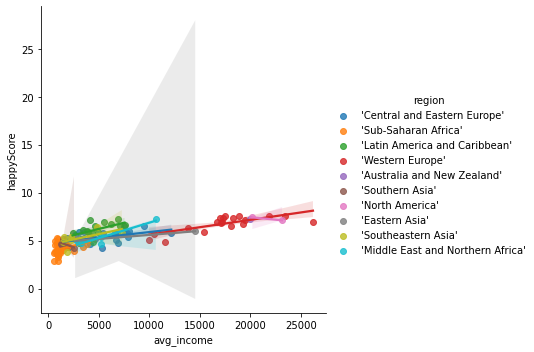

In [107]:
sns.lmplot(x="avg_income",y="happyScore",hue = "region", data =data)
plt.show()


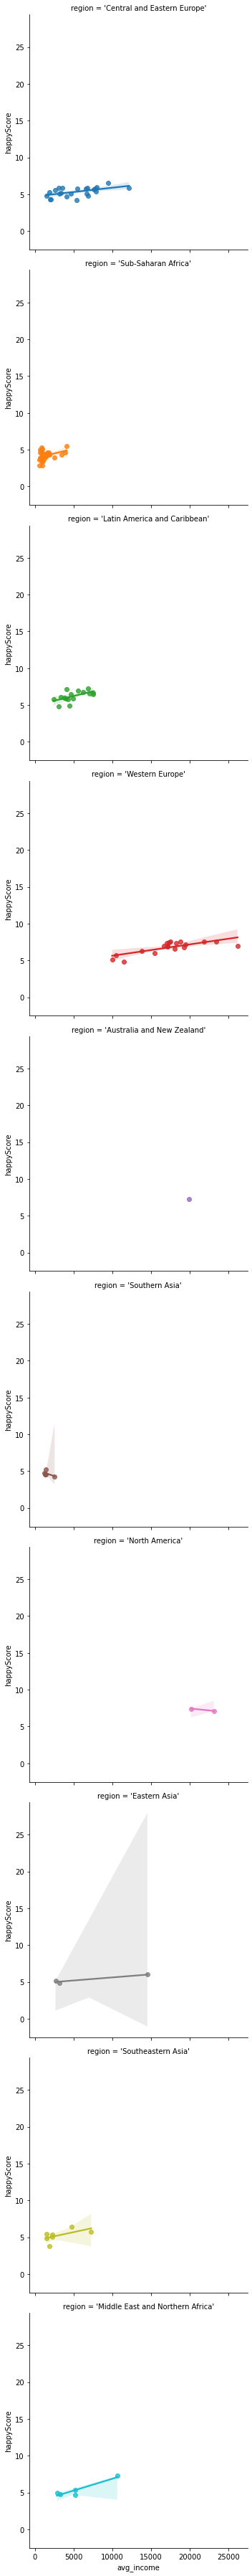

In [108]:
sns.lmplot(x="avg_income",y="happyScore",hue = "region", data =data,row="region")
plt.show()


## [ Average Satisfaction vs Happy Score ] With respect to different Region

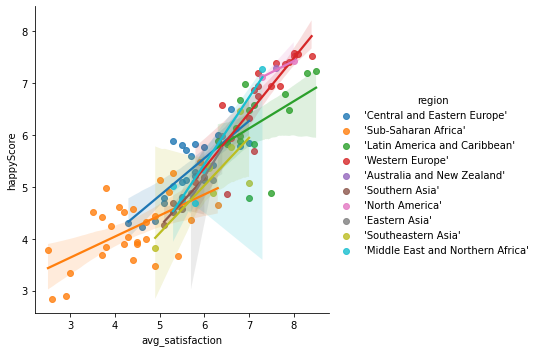

In [109]:
sns.lmplot(x="avg_satisfaction",y="happyScore",hue = "region", data =data)
plt.show()


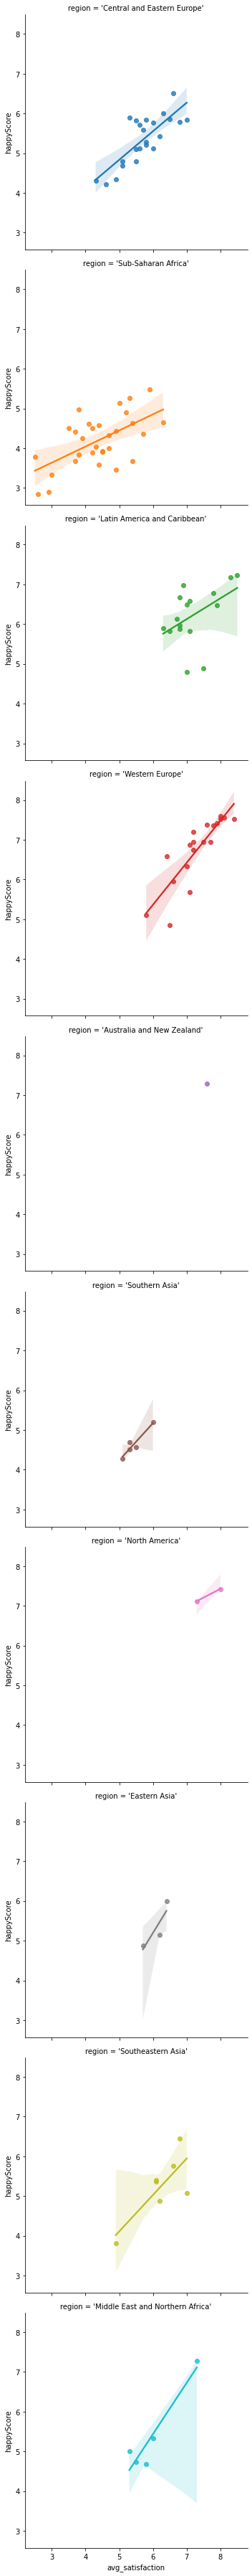

In [110]:
sns.lmplot(x="avg_satisfaction",y="happyScore",hue = "region", data =data,row="region")
plt.show()

### Average income :
     The average income is defined as the income that is earned by per person in a given area for a period of time. It is calculated as: Average income = total income of the area/total population of that area.
### Income inequality :
     Income inequality is how unevenly income is distributed throughout a population. The less equal the distribution, the higher income inequality is. Income inequality is often accompanied by wealth inequality, which is the uneven distribution of wealth.
### 3 Main reasons of income inequality :
* Technological change
* Globalization 
* The decline of unions and the eroding value of the minimum wage.
### 3Disturbing effects of income inequality :
* Include higher rates of health and social problems.
* Lower rates of social goods.
* Lower population-wide satisfaction and happiness and even a lower level of economic growth when human capital is neglected for high-end consumption.
### Happy Score :
    The Happiness Index measures life satisfaction, the feeling of happiness, and other happiness. domains: psychological well-being, health, time balance, community, social support, education, arts. and culture, environment, governance, material well-being, and work.

### Parameters of Happy Score :
* GDP per capita.
* Healthy life expectancy.
* Social support.
* Freedom of choice.
* Generosity.
* Perceptions of corruption.
### GDP :
      Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period. As such, it also measures the income earned from that production, or the total amount spent on final goods and services (less imports).
        

### Thankyou!